In [1]:
import ipywidgets
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib import rcParams
import random as rd
import warnings

from collections import Counter

In [2]:
from generate_homophilic_graph_symmetric import homophilic_ba_graph

In [3]:
def network(N, m, minority_fraction, homophily):
    G = homophilic_ba_graph(N = N, m = m, minority_fraction = minority_fraction, homophily = homophily)
    
    color = nx.get_node_attributes(G, 'color')
    d = dict(G.degree)
    
    pos = nx.spring_layout(G, k = 0.25) # k: optimal distance between nodes
    
    plt.figure(figsize=(6, 6))
    nx.draw_networkx_edges(G, pos = pos, alpha = 0.4)
    nx.draw_networkx_nodes(G, pos = pos, nodelist = color.keys(),
                           node_size = [v * 15 for v in d.values()],
                           node_color = list(color.values()),
                           cmap=plt.cm.Reds_r)
    
    plt.axis('off')
    plt.show()


In [4]:
rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 14,
})

def plot_degree_distribution_by_group(N, m, minority_fraction, homophily):
    G = homophilic_ba_graph(N=N, m=m, minority_fraction=minority_fraction, homophily=homophily)

    # Node groups
    colors = nx.get_node_attributes(G, 'color')
    minority_nodes = [n for n, col in colors.items() if col == 'red']
    majority_nodes = [n for n, col in colors.items() if col == 'blue']

    # Degrees
    degrees_min = [G.degree(n) for n in minority_nodes]
    degrees_maj = [G.degree(n) for n in majority_nodes]

    # Degree counts
    count_min = Counter(degrees_min)
    count_maj = Counter(degrees_maj)

    x_min, y_min = zip(*sorted(count_min.items()))
    x_maj, y_maj = zip(*sorted(count_maj.items()))
    y_min = np.array(y_min) / sum(y_min)
    y_maj = np.array(y_maj) / sum(y_maj)

    # Degree share
    total_degree = sum(dict(G.degree()).values())
    share_min = sum(degrees_min) / total_degree
    share_maj = sum(degrees_maj) / total_degree

    # Plot
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.scatter(x_min, y_min, color='C1', label='Minority', s=18)
    ax.scatter(x_maj, y_maj, color='C0', label='Majority', s=18)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel(r'Degree $(k)$')
    ax.set_ylabel(r'$p(k)$')
    ax.legend(fontsize=10)
    # No grid this time

    # Smaller inset
    inset = ax.inset_axes([0.63, 0.63, 0.28, 0.23])  # <-- made smaller
    inset.bar([0, 1], [share_min, share_maj], color=['C1', 'C0'], width=0.8)
    inset.axhline(minority_fraction, linestyle='--', color='C1')
    inset.axhline(1 - minority_fraction, linestyle='--', color='C0')
    inset.set_ylim(0, 1)
    inset.set_xticks([])
    inset.set_ylabel(r'$K_g / K$', fontsize=9)
    inset.tick_params(axis='y', labelsize=8)

    plt.tight_layout()
    plt.show()


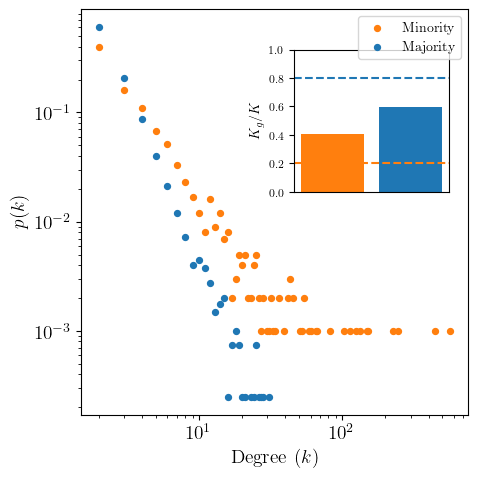

In [23]:
plot_degree_distribution_by_group(N=5000, m=2, minority_fraction=0.2, homophily=0.2)

In [15]:


def plot_network(G):
    color = nx.get_node_attributes(G, 'color')
    d = dict(G.degree)
    pos = nx.spring_layout(G, k=0.25)

    plt.figure(figsize=(6, 6))
    nx.draw_networkx_edges(G, pos=pos, alpha=0.4)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=color.keys(),
                           node_size=[v * 15 for v in d.values()],
                           node_color=list(color.values()),
                           cmap=plt.cm.Reds_r)
    plt.axis('off')
    plt.title("Network Visualization")
    plt.show()

def plot_degree_distribution_by_group(N, m, minority_fraction, homophily):
    # Generate the graph
    G = homophilic_ba_graph(N=N, m=m, minority_fraction=minority_fraction, homophily=homophily)

    # First plot the network
    plot_network(G)

    # Group nodes by color
    node_colors = nx.get_node_attributes(G, 'color')
    minority_nodes = [n for n, color in node_colors.items() if color == 'red']
    majority_nodes = [n for n, color in node_colors.items() if color == 'blue']

    # Get degrees
    degrees_minority = [G.degree(n) for n in minority_nodes]
    degrees_majority = [G.degree(n) for n in majority_nodes]

    # Compute degree distributions
    degree_count_min = Counter(degrees_minority)
    degree_count_maj = Counter(degrees_majority)

    # Sort and normalize
    if len(degree_count_min) == 0 or len(degree_count_maj) == 0:
        print("Empty group degree counts — check if the groups exist.")
        return

    x_min, y_min = zip(*sorted(degree_count_min.items()))
    x_maj, y_maj = zip(*sorted(degree_count_maj.items()))
    y_min = np.array(y_min) / sum(y_min)
    y_maj = np.array(y_maj) / sum(y_maj)

    # Degree share inset
    total_degree = sum(dict(G.degree()).values())
    min_degree = sum([G.degree(n) for n in minority_nodes]) / total_degree
    maj_degree = sum([G.degree(n) for n in majority_nodes]) / total_degree

    # Plot degree distribution
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.scatter(x_min, y_min, color='#e66f51', label='Minority', s=25, alpha=0.8)
    ax.scatter(x_maj, y_maj, color='#3b75af', label='Majority', s=25, alpha=0.8)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Degree (k)')
    ax.set_ylabel('p(k)')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    ax.legend()

    # Inset plot
    inset = ax.inset_axes([0.6, 0.65, 0.3, 0.3])
    inset.bar([0, 1], [min_degree, maj_degree], color=['#e66f51', '#3b75af'], width=0.8)
    inset.axhline(minority_fraction, linestyle='--', color='#e66f51')
    inset.axhline(1 - minority_fraction, linestyle='--', color='#3b75af')
    inset.set_xticks([])
    inset.set_ylim(0, 1)
    inset.set_ylabel(r'$K_g / K$', fontsize=10)
    inset.tick_params(axis='y', labelsize=8)

    plt.tight_layout()
    plt.show()


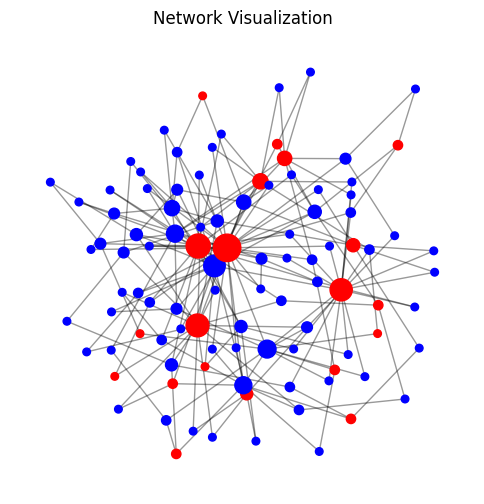

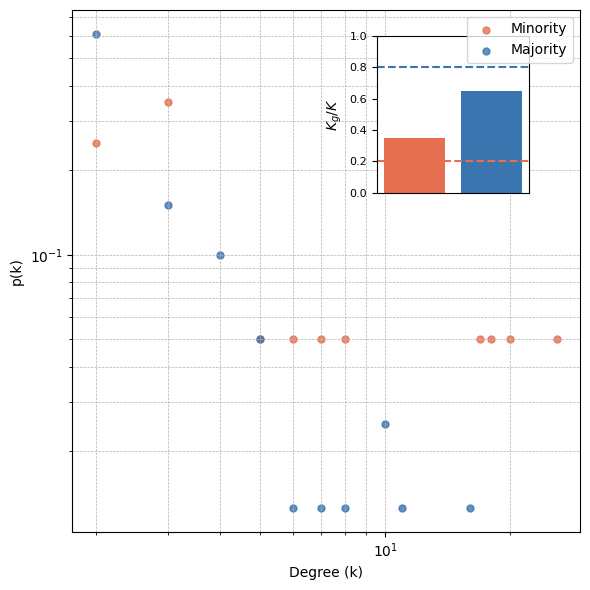

In [16]:
plot_degree_distribution_by_group(N=100, m=2, minority_fraction=0.2, homophily=0.2)


In [14]:
import os
import random
from pathlib import Path
import networkx as nx
from tqdm import tqdm
import pickle

In [18]:
def save_graphs_for_homophily_range(
    N, m, minority_fraction, homophily_values, num_graphs=20, base_seed=42, base_folder="degree_dist"
):
    """
    Generates and saves graphs for each homophily value, multiple times with different seeds.
    Stores graphs using pickle format in a structured folder and logs seeds used.
    """
    base_path = Path(base_folder)
    base_path.mkdir(exist_ok=True)

    for h in homophily_values:
        folder = base_path / f"h_{h:.2f}"
        folder.mkdir(parents=True, exist_ok=True)
        seed_log = []

        for i in tqdm(range(num_graphs), desc=f"Generating graphs for homophily={h:.2f}"):
            seed = base_seed + i  # different seed for each graph
            G = homophilic_ba_graph(N=N, m=m, minority_fraction=minority_fraction, homophily=h, seed=seed)
            filename = folder / f"graph_sim_{i}.pkl"

            # Save the graph using pickle
            with open(filename, "wb") as f:
                pickle.dump(G, f)

            # Log the seed used
            seed_log.append(f"graph_sim_{i}.pkl,{seed}")

        # Write seed log to file
        with open(folder / "seed_log.txt", "w") as log_file:
            log_file.write("\n".join(seed_log))

In [82]:
# === Parameters ===
N = 5000
m = 2
minority_fraction = 0.2
homophily_values = [round(h, 1) for h in [i * 0.2 for i in range(6)]]  # 0.0 to 1.0
num_graphs = 20

# === Run the experiment ===
save_graphs_for_homophily_range(N, m, minority_fraction, homophily_values, num_graphs)

Generating graphs for homophily=0.00:   0%|          | 0/20 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [55]:
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

def get_group_degrees(G):
    color_map = nx.get_node_attributes(G, 'color')
    d_min = [G.degree(n) for n, c in color_map.items() if c == 'red']
    d_maj = [G.degree(n) for n, c in color_map.items() if c == 'blue']
    return d_min, d_maj

def average_distributions(graph_paths):
    min_counter_total = Counter()
    maj_counter_total = Counter()

    for path in graph_paths:
        with open(path, "rb") as f:
            G = pickle.load(f)
        d_min, d_maj = get_group_degrees(G)
        min_counter_total += Counter(d_min)
        maj_counter_total += Counter(d_maj)

    # Normalize
    min_x, min_y = zip(*sorted(min_counter_total.items()))
    maj_x, maj_y = zip(*sorted(maj_counter_total.items()))
    min_y = np.array(min_y) / sum(min_y)
    maj_y = np.array(maj_y) / sum(maj_y)

    return min_x, min_y, maj_x, maj_y

In [77]:
def plot_avg_distribution(folder_path, output_path, h_value):
    minority_fraction = 0.2  # fixed

    graph_files = sorted(Path(folder_path).glob("*.pkl"))
    if not graph_files:
        print(f"No graph files found in {folder_path}")
        return

    # Get average degree distributions
    min_x, min_y, maj_x, maj_y = average_distributions(graph_files)

    # Compute K_g / K
    total_min_deg = 0
    total_maj_deg = 0
    total_deg = 0

    for path in graph_files:
        with open(path, "rb") as f:
            G = pickle.load(f)
        color = nx.get_node_attributes(G, 'color')
        degrees = dict(G.degree())

        min_nodes = [n for n, c in color.items() if c == 'red']
        maj_nodes = [n for n, c in color.items() if c == 'blue']

        total_min_deg += sum(degrees[n] for n in min_nodes)
        total_maj_deg += sum(degrees[n] for n in maj_nodes)
        total_deg += sum(degrees.values())

    min_ratio = total_min_deg / total_deg
    maj_ratio = total_maj_deg / total_deg

    # Plotting
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot(min_x, min_y, 'o', color='tab:orange', markersize=4)
    ax.plot(maj_x, maj_y, 'o', color='tab:blue', markersize=4)

    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(r"\textit{Degree} ($k$)", fontsize=12)
    ax.set_ylabel(r"\textit{p}($k$)", fontsize=12)

    # Inset bar chart
    inset = ax.inset_axes([0.6, 0.6, 0.3, 0.3])
    inset.bar([0, 1], [min_ratio, maj_ratio], color=['tab:orange', 'tab:blue'], width=0.6)
    inset.axhline(minority_fraction, linestyle='--', color='tab:orange')
    inset.axhline(1 - minority_fraction, linestyle='--', color='tab:blue')
    inset.set_xticks([])
    inset.set_yticks([0, 0.5, 1.0])
    inset.set_ylabel(r"$K_g/K$", fontsize=10)
    inset.tick_params(axis='y', labelsize=8)

    plt.tight_layout()
    output_path.parent.mkdir(exist_ok=True, parents=True)
    plt.savefig(output_path, format='jpg', dpi=300)
    plt.close()

In [78]:
degree_dist_root = Path("degree_dist")
output_dir = Path("degree_plot")
homophily_folders = sorted([f for f in degree_dist_root.iterdir() if f.is_dir()])

for folder in homophily_folders:
    h_label = folder.name  # e.g. "h_0.00"
    try:
        h_value = float(h_label.split("_")[1])
    except:
        continue
    output_file = output_dir / f"{h_label}.jpg"
    plot_avg_distribution(folder, output_file, h_value)

In [79]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from PIL import Image
from pathlib import Path
import matplotlib.image as mpimg
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'

def make_horizontal_panel_selected(image_folder='degree_plot', output_file='panel_plot.jpg'):
    folder = Path(image_folder)
    homophily_values = [0.00, 0.20, 0.40, 0.60, 0.80, 1.00]

    num_images = len(homophily_values)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2.5, 3), dpi=300)

    for ax, h in zip(axes, homophily_values):
        h_str = f"{h:.2f}"
        img_path = folder / f"h_{h_str}.jpg"
        if not img_path.exists():
            print(f"Missing: {img_path}")
            ax.axis('off')
            continue
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(rf"$h = {h_str}$", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    output_path = folder / output_file
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"Panel saved to: {output_path}")


In [81]:
make_horizontal_panel_selected(image_folder='degree_plot', output_file='panel_h_selected.jpg')


Panel saved to: degree_plot/panel_h_selected.jpg
